In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keyword
from IPython.display import set_matplotlib_formats
from pprint import pprint
import patternrekt as prekt
set_matplotlib_formats('retina')
plt.style.use('seaborn-notebook')

# Should We Eat the Mushroom
> **Every mushroom is edible except some can be eaten exactly once.**

In this class we will consider the problem of deciding whether the given mushroom is edible or poisonous.

<img src="mushroom.JPG" alt="Mushroom" width="200"/>

Luckily we don't have to sacrifice anyone tasting mushrooms since certain brave souls have done that for us.
Data from Kaggle: https://www.kaggle.com/uciml/mushroom-classification

The data descibes the features of the mushroom and whether it is poisonous.


## Basics Stuff

### Reading Data

In [2]:
#reading Data (civilized way)
df = pd.read_csv('mushrooms_train.csv')
#fix messy column names
#print(df.columns)
df.columns = df.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )
#print(df.columns)
#or if you want to go manual (My favorite)
#data = np.genfromtxt('mushrooms.csv', skip_header=1, dtype=str, delimiter=',')

In [3]:
display(df)

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l
6995,p,f,y,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
6996,p,k,y,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
6997,e,k,f,w,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g


### Accessing Rows

In [4]:
# This is how you iterate by row
# Use this for now
# Eventually you will learn that there is usually a better way to do it.
# And that this is typically the last resort

for row in df.itertuples(name="Mushroom"):
    if row.Index > 1:
        break
    print(row)
    print('******* cap_shape', row.cap_shape)
    
# or you can access it by like this note it's bracket not parentheses
print(df.iloc[300].odor)
print(df.odor[300])


Mushroom(Index=0, xclass='p', cap_shape='x', cap_surface='s', cap_color='n', bruises='t', odor='p', gill_attachment='f', gill_spacing='c', gill_size='n', gill_color='k', stalk_shape='e', stalk_root='e', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='k', population='s', habitat='u')
******* cap_shape x
Mushroom(Index=1, xclass='e', cap_shape='x', cap_surface='s', cap_color='y', bruises='t', odor='a', gill_attachment='f', gill_spacing='c', gill_size='b', gill_color='k', stalk_shape='e', stalk_root='c', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='n', population='n', habitat='g')
******* cap_shape x
n
n


### Basic Statistics

In [6]:
#some simple statistics
pd.set_option('display.max_columns', 100)
df.describe()

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,v,d
freq,3743,3442,2892,1775,3651,3056,6982,5941,5116,1410,3986,3735,4528,4288,3884,3801,6999,6983,6682,3503,1924,3314,2890


In [7]:
df.cap_shape.value_counts()

x    3442
f    2988
b     323
k     212
s      32
c       2
Name: cap_shape, dtype: int64

In [8]:
df.cap_shape

0       x
1       x
2       b
3       x
4       x
       ..
6994    k
6995    f
6996    k
6997    k
6998    x
Name: cap_shape, Length: 6999, dtype: object

### Human Learning

#### 1) Let us calculate some basic stuff. What is the probabiliy of you dying if you pick a random mushroom and eat?
$$
P(\text{poisonous}) = ???
$$

In [13]:
n_dead = sum(df.xclass=='p')
n_all = len(df)

p_poison = n_dead/n_all
print(p_poison)

0.4652093156165166


#### 2) Given that it is a red cap mushroom. What is the probability that it is poisonous?

$$
P(\text{poisonous} | \text{red cap}) = ???
$$

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

In [16]:
n_poison_and_red = sum((df.cap_color=='e') & (df.xclass=='p'))
n_all = len(df)

n_red = sum(df.cap_color=='e')

p_poison_and_red = n_poison_and_red/n_all
p_red = n_red/n_all
p_poison_given_red = p_poison_and_red/p_red
print(p_poison_and_red, p_red, p_poison_given_red)

0.07801114444920702 0.16716673810544364 0.4666666666666666


#### 3) Given that a mushroom is poisonous. What is the probability that it has a red cap?

$$
    P(\text{red cap} | \text{poisonous}) = ???
$$


In [17]:
poison_only_df = df[df.xclass=='p']
n_poison_and_red = sum(poison_only_df.cap_color=='e')
print(n_poison_and_red/len(poison_only_df))

0.1676904176904177


#### 4) Which cap color has the highest probability of killing you? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

#### 5) If your friend die of eating mushroom, what is the cap color that he most likely ate? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

#### 6) If we were to decide whether to eat a given mushroom or not which one should we calculate?

#### 7) What is the relation between
$$ P(\text{poisonous} | \text{red cap}) \textbf{ and } P(\text{red cap} | \text{poisonous}) $$

#### 8) Visualization: Let us learn how to draw some fancy graph? Plot the graph below for all the columns.

The width of each bar represents how many mushroom are of given cap_color.

The stack shows the percentage of poisonous/edible given cap_color.

[('n', {'total': 1775, 'p': 708, 'e': 1067}),
 ('g', {'total': 1708, 'p': 808, 'e': 900}),
 ('e', {'total': 1170, 'p': 546, 'e': 624}),
 ('y', {'total': 1065, 'p': 665, 'e': 400}),
 ('w', {'total': 917, 'p': 320, 'e': 597}),
 ('b', {'total': 168, 'p': 120, 'e': 48}),
 ('p', {'total': 137, 'p': 88, 'e': 49}),
 ('c', {'total': 27, 'p': 1, 'e': 26}),
 ('u', {'total': 16, 'p': 0, 'e': 16}),
 ('r', {'total': 16, 'p': 0, 'e': 16})]

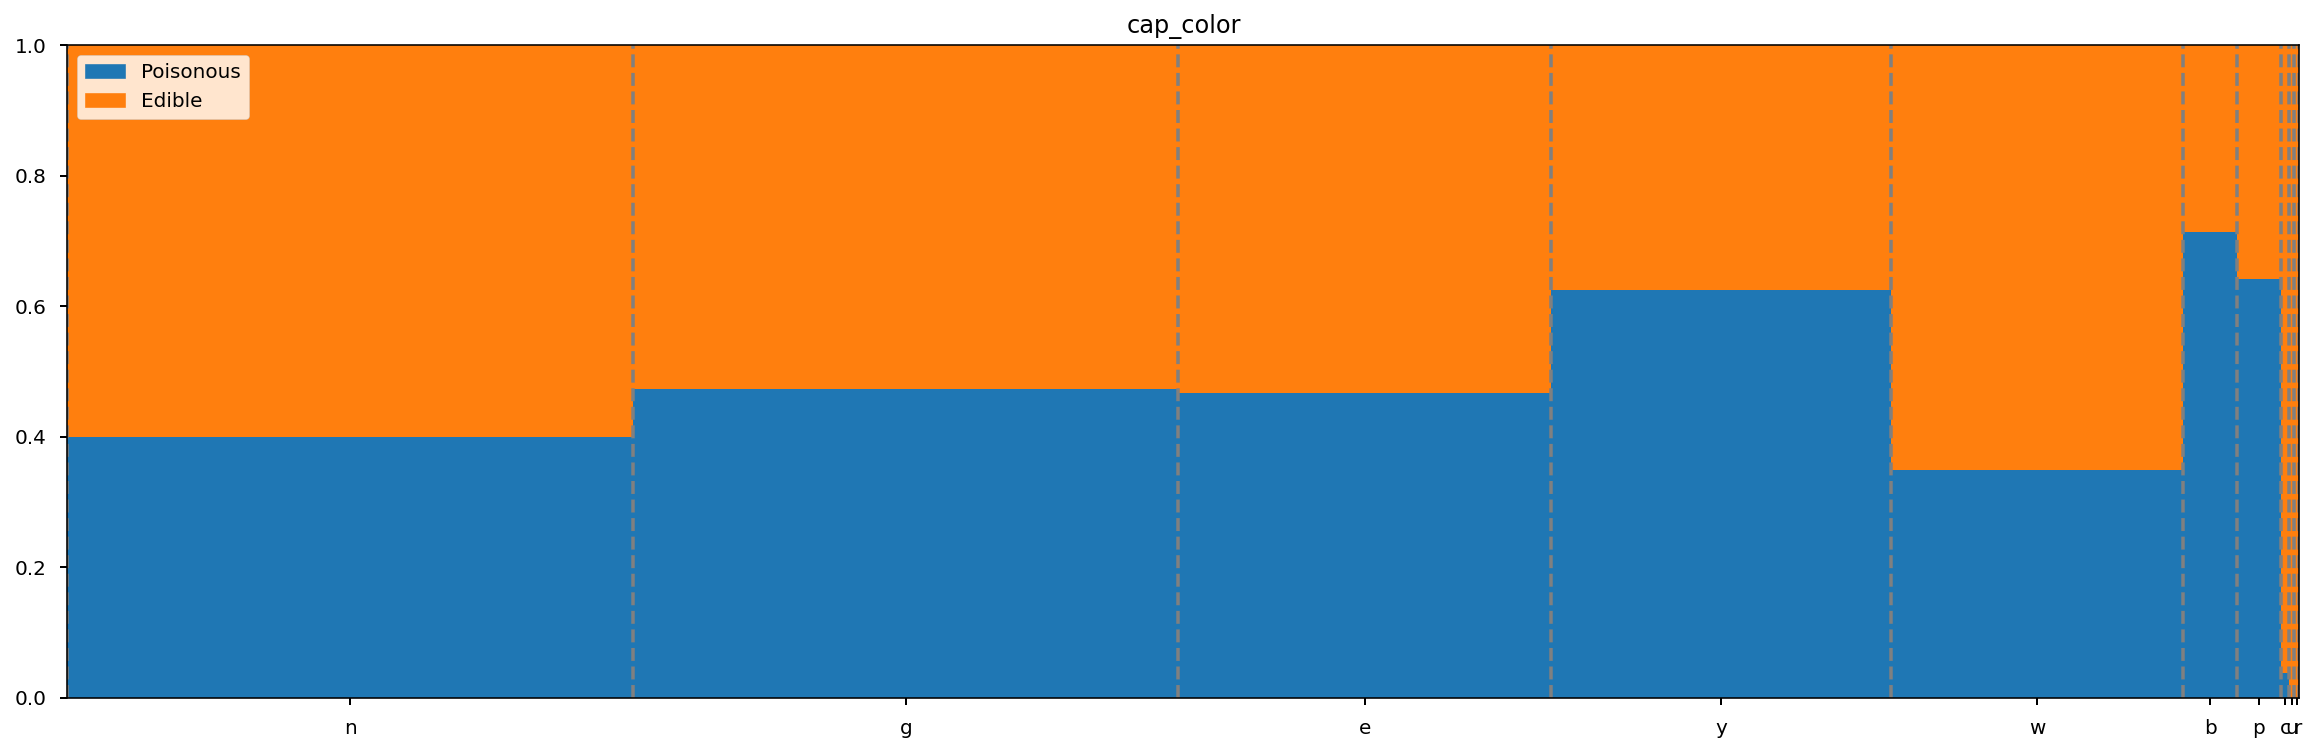

In [19]:
#see pattenrekt.py for the magic optimize it and make a pull request if you like
prekt.mushroom_plot(df.cap_color, df.xclass, legend_map={'p': 'Poisonous', 'e': 'Edible'})

#### 9) With data exploration from 8) If we want to use exactly one mushroom feature to decide edibility of a mushroom, which one do we use? Code it up.

In [17]:
#def simple_is_edible(mushroom):
    # mushroom should be stuff you get from df.itertuple
    #return probability of it being EDIBLE

#### 10) How should we draw the probability line whether to eat the mushroom or not? We will cover this later.

#### 11) What if we want to use more feature? What is 
$$
P(\text{edible} | \text{red cap} \cap \text{smooth surface} \cap \text{black spore})
$$

How would you implement the equivalent of simple_is_edible? Don't implement it though.

#### 12) What's wrong with look up table? This is called cursed of dimensionality.

#### Epilogue

Note that we have just made a classifier that can classify a poisonous mushroom from edible one to a certain degree.

We 1) learned something about mushroom plotting graph/printing values **then** 2) transfer the knowledge to computer. This is called *human learning*.

What we wish to do is to have computer automate the process of learning itself. That to have computer look up the data then figure out how to calculate the probability. 

(This kind of machine learning is called supervised machine learning for the fact that you supervise the computer on what's right)

### Naive Bayes Classifier

To make things more concrete let us look at the simplest generative model. Naive Bayes Classifier.

#### 1) What is the definition of Conditional Probability
$$P(A|B) = ???$$

Also revert that and find out what is
$$
P(A \cap B) = ???
$$

#### 2) Let

- $R$ = Red Cap
- $S$ = Smooth Surface
- $B$ = Black spore 
- $E$ = Edible

Fill in the blank

$$
P(E | R \cap S \cap B ) = \frac{P(...)}{P(....)}
$$

#### 3) What's wrong with using lookup table to calculate the term on the top. (ignore the term at the bottom for now)

#### 4) Simplify the term on the top
$$
P(R \cap S \cap B \cap E) = P(R| ...) \times P(...)
$$

#### 5) Simplify it further do it all the way
$$
P(R \cap S \cap B \cap E) = P(...|...) \times P(...|...) \times P(...|...)\times P(...)
$$

#### 6) Why is calculating it directly is a bad idea?

#### 7) What is Conditional Independence Assumption? Using this assumption what is now the
$$ P(R \cap S \cap B \cap E) = ...$$

#### 8) What is Prior?

#### 9) The denominator is called the evidence term. Why is calculating this a bad idea?

#### 10) What do we know about

$$P(E| R \cap S \cap B) + P(\sim E| R \cap S \cap B)$$

#### 11) Show that
$$
P(R \cap S \cap B) = P(...|...)P(...|...)P(...|...)P(...|...)P(E) + P(...|...)P(...|...)P(...|...)P(...|...)P(\sim E)
$$

#### 12) Implement the following
This will make your life a bit easier

In [ ]:
# class NaiveBayes:
#     def __init__(self, df, class_col):
#         #do something
#         #you *may* want to cache every possible query for cond_prof. Up to you.
#         pass
#
#     # ex: cond_prof('cap_color','r','e') => P(cap_color==red|edible)
#     def cond_prob(self, feature_col, feature_value, class_value):
#          return P(feature_col==feature_value | class_col==class_value)
#   
#     #mushroom is stuff you got from itertuple
#     def prob_edible(self, mushroom):
#         return P(edible | all mushroom features)

#### 13) There is a test file at mushrooms_test.csv

If we make a cut at probability of 0.5(that is >=0.5 edible, <0.5 don't eat). How many do we get correctly?



#### 14) Why don't we test on the train data? We will cover this later.

#### 15) Is 0.5 cutoff a good idea? We will also talk about his later.